In [81]:
#Eigen faces from labebled faces in the wild(lfw)
#each data point can be like weighted sum of some components
#based on variance of the data
#reconstruction of data from components can be done

from sklearn.datasets import fetch_lfw_people
import warnings
warnings.filterwarnings('ignore')

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

In [82]:
image_shape

(87, 65)

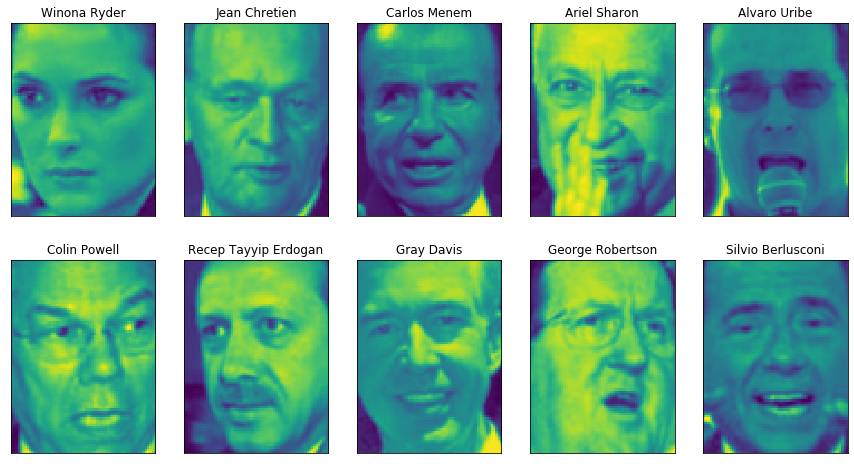

In [83]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [84]:
#3023 images each of 87 * 65, 62 people
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [86]:
import numpy as np
import pandas as pd
counts = np.bincount(people.target)
df = pd.DataFrame()
df['Names'] = people.target_names
df['count'] = counts
#df

#Data is very skewed, having more images for Bush, powell etc
df.sort_values(by = 'count', ascending = False)

Names  count
14      George W Bush    530
10       Colin Powell    236
58         Tony Blair    144
12    Donald Rumsfeld    121
15  Gerhard Schroeder    109
..                ...    ...
4      Angelina Jolie     20
30        Jiang Zemin     20
46        Paul Bremer     20
22        Igor Ivanov     20
43  Michael Bloomberg     20

[62 rows x 2 columns]

In [87]:
#Making data less skewed by taking only 50 images of every person

mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = True
    
X_people = people.data[mask]
y_people = people.target[mask]

#scale the grey scale value btw 0 and 1
#instead of 0 and 255 for better numerical stability
X_people = X_people/255

In [88]:
y_people

array([61, 25,  9, ...,  9, 37, 22])

In [89]:
X_people

array([[0.22352941, 0.23660131, 0.30588236, ..., 0.06797386, 0.06535947,
        0.08888888],
       [0.2614379 , 0.31633985, 0.3477124 , ..., 0.03398693, 0.03267974,
        0.03660131],
       [0.07320261, 0.05620915, 0.05882353, ..., 0.08888888, 0.08888888,
        0.10065359],
       ...,
       [0.14248365, 0.0875817 , 0.10980392, ..., 0.05620915, 0.02614379,
        0.02091503],
       [0.21176471, 0.25620916, 0.22091503, ..., 0.82222223, 0.8235294 ,
        0.8326797 ],
       [0.43398693, 0.50326794, 0.5699346 , ..., 0.05490196, 0.05490196,
        0.05359477]], dtype=float32)

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten = True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [100]:
knn_pca = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.30426356589147285

In [103]:
pca.components_.shape

(100, 5655)

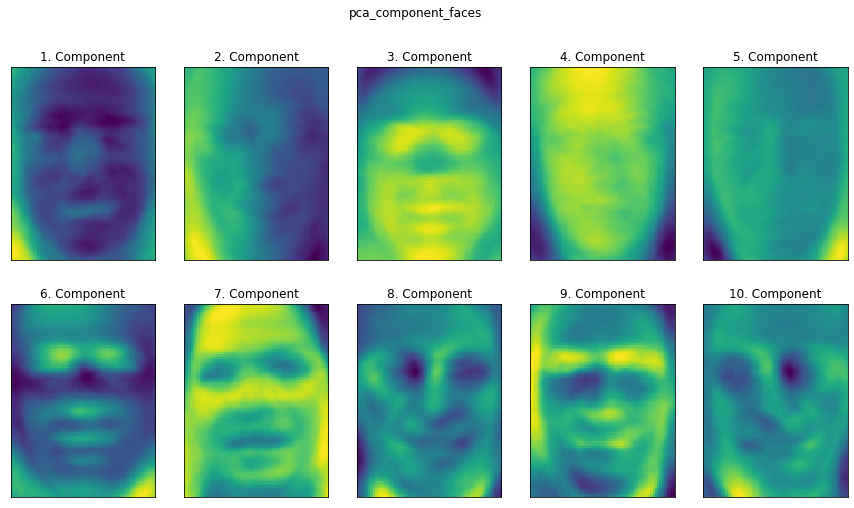

In [109]:
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_component_faces")
for i, (components, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(components.reshape(image_shape), cmap = 'viridis')
    ax.set_title("%d. Component" %(i+1))

In [ ]:
#Non Matrix Factorization (NMF)
#components and coefficients are greater than zero
#This method applied to data where each feature is non negative, as a non negative sum of of non negative 
#         components can not become negative
#helpful for data created as addition of several independent sources
#         audio tracks of multiple speakers
#         music with many instruments
#NMF can identify original components that make up combined data
#algo choose direction towards extremes of data or mean(single dimension)


#Other decomposition
#Independent component Analysis(ICA)
#Factor Analysis(FA)
#Sparce Coding